In [51]:
import sympy
sympy.init_printing()

u_max,u_star,rho_max,rho_star,A,B =\
sympy.symbols('u_max u_star rho_max rho_star A B')

In [52]:
eq1 = sympy.Eq(0,u_max*rho_max*(1 - A*rho_max-B*rho_max**2))
eq2 = sympy.Eq(0,u_max*(1-2*A*rho_star-3*B*rho_star**2))
eq3 = sympy.Eq(u_star,u_max*(1-A*rho_star-B*rho_star**2))

In [53]:
eq1

In [54]:
eq2

In [55]:
eq3

In [56]:
eq2-eq3

In [57]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4

In [58]:
eq4.simplify()

In [59]:
eq4

In [60]:
eq4.expand()

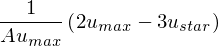

In [61]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

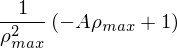

In [62]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

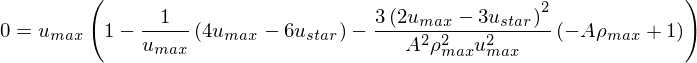

In [63]:
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

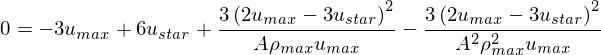

In [64]:
quadA.simplify()

In [65]:
A_sol = sympy.solve(quadA,A)

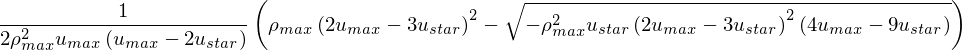

In [66]:
A_sol[0]

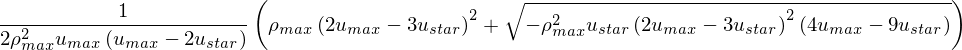

In [68]:
A_sol[1]

In [69]:
aval = A_sol[0].evalf(subs={u_star:1.5,u_max:2.0,rho_max:15.0})
aval

In [70]:
A_sol[1].evalf(subs={u_star:0.7,u_max:1.0,rho_max:10.0})

In [71]:
bval = B_sol.evalf(subs={rho_max:15.0,A:aval})
bval

In [72]:
sympy.init_printing(use_latex=False)

In [73]:
type (rho_max), type(u_max)

(sympy.core.symbol.Symbol, sympy.core.symbol.Symbol)

In [74]:
rho_max = 15.
u_max = 2.

In [75]:
def computeF(u_max,rho,aval,bval):
    return u_max*rho*(1-aval*rho-bval*rho**2)

In [76]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16

In [77]:
def rho_green_light(nx,rho_light):
    rho_initial=numpy.arange(nx)*2./nx*rho_light
    rho_initial[(nx-1)/2:]=0
    return rho_initial

In [78]:
nx = 81
nt = 30
dx = 4.0/(nx-1)
x = numpy.linspace(0,4,nx)
rho_light = 5.5

In [79]:
rho_initial = rho_green_light(nx,rho_light)
print(rho_initial)

[ 0.          0.13580247  0.27160494  0.40740741  0.54320988  0.67901235
  0.81481481  0.95061728  1.08641975  1.22222222  1.35802469  1.49382716
  1.62962963  1.7654321   1.90123457  2.03703704  2.17283951  2.30864198
  2.44444444  2.58024691  2.71604938  2.85185185  2.98765432  3.12345679
  3.25925926  3.39506173  3.5308642   3.66666667  3.80246914  3.9382716
  4.07407407  4.20987654  4.34567901  4.48148148  4.61728395  4.75308642
  4.88888889  5.02469136  5.16049383  5.2962963   0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


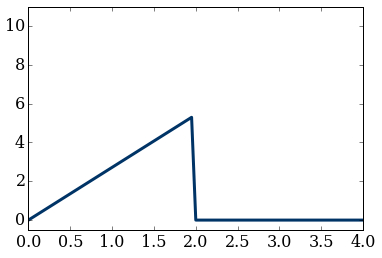

In [32]:
pyplot.plot(x,rho_initial,color='#003366', ls ='-', lw=3)
pyplot.ylim(-0.5,11.);

In [33]:
def ftbs(rho,nt,dt,dx,rho_max,u_max):
    rho_n = numpy.zeros((nt,len(rho)))
    rho_n[0,:]=rho.copy()
    
    for t in range(1,nt):
        F = computeF(u_max,rho,aval,bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0]=rho[0]
        rho_n[t,-1]=rho[-1]
        rho = rho_n[t].copy()
    return rho_n

In [34]:
sigma=1.
dt = sigma*dx/u_max
rho_n = ftbs(rho_initial,nt,dt,dx,rho_max,u_max)

In [35]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation


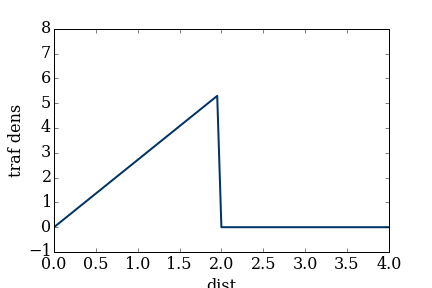
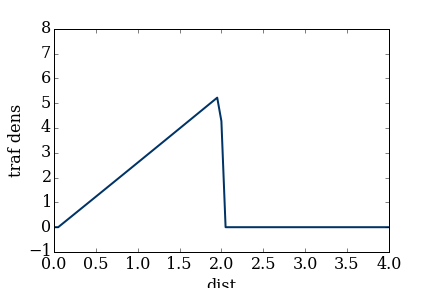
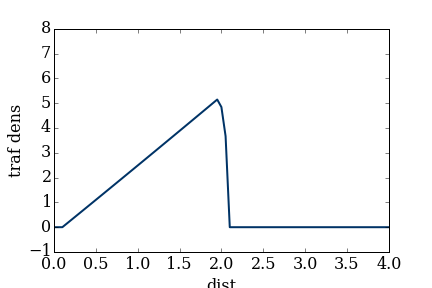
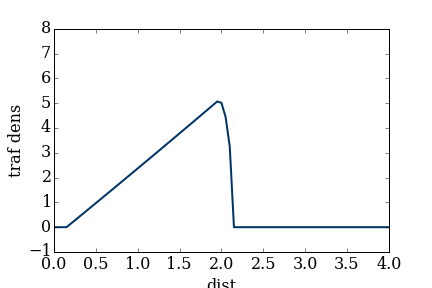
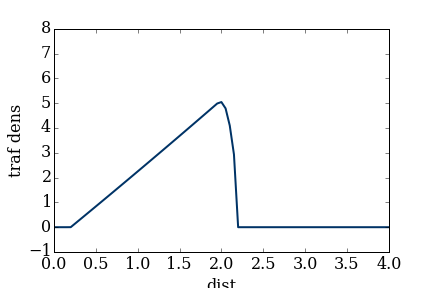
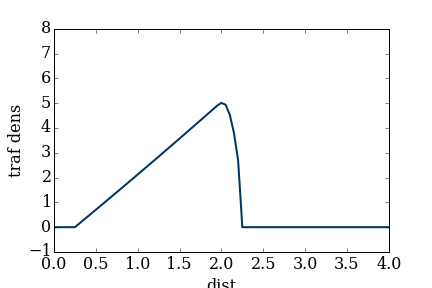
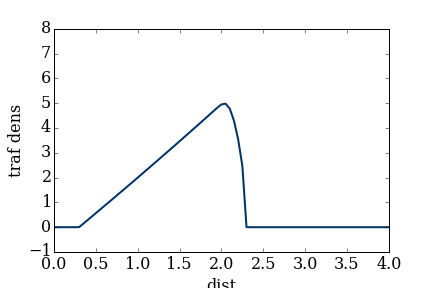
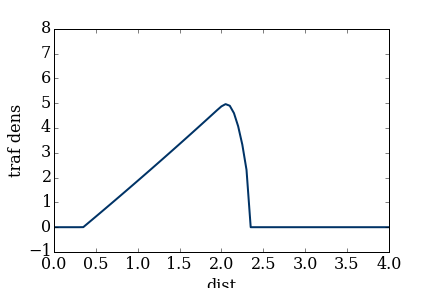
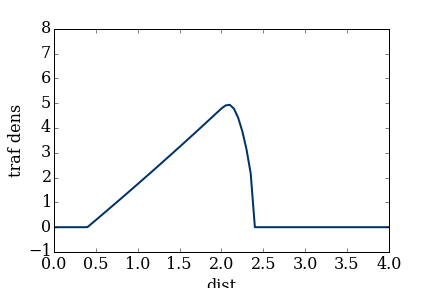
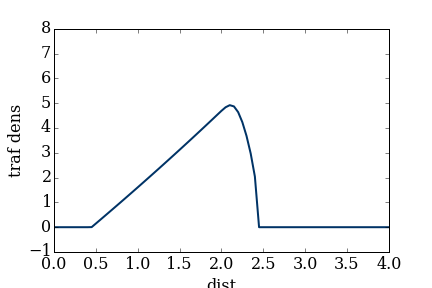
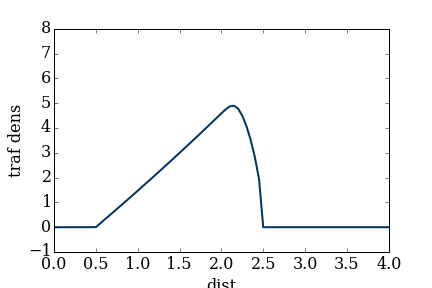
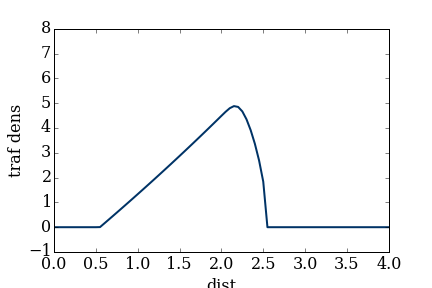
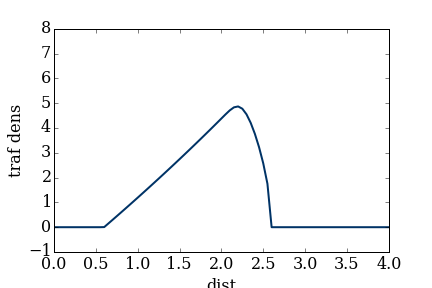
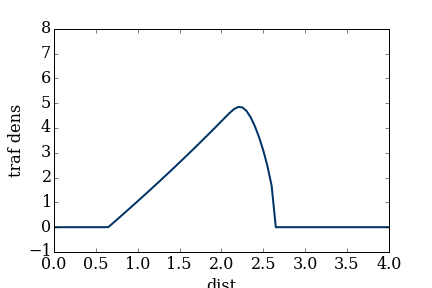
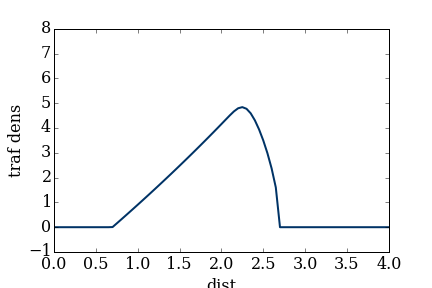
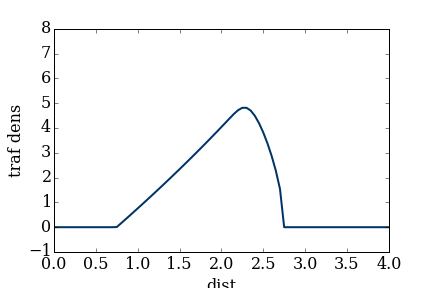
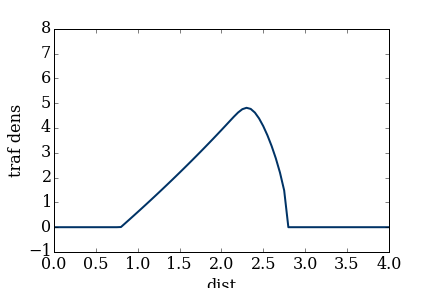
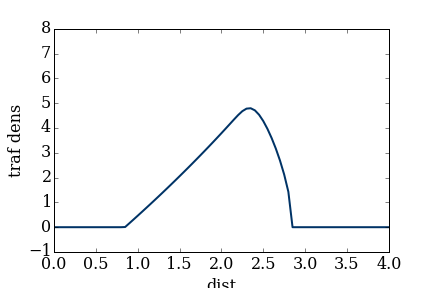
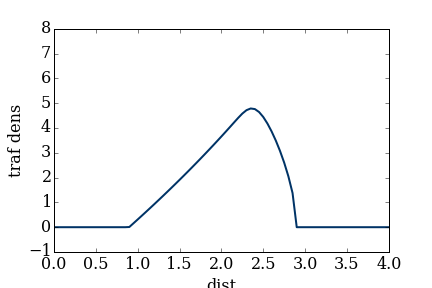
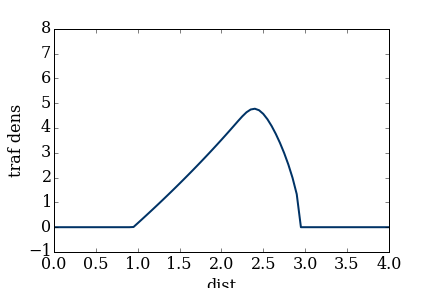
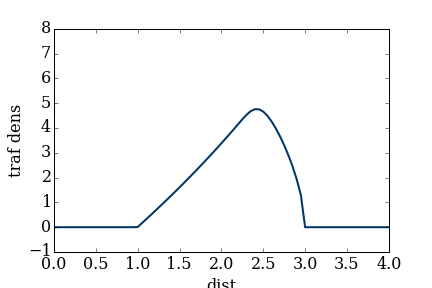
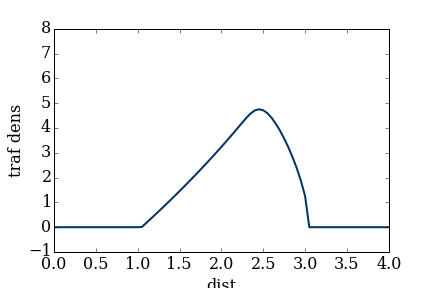
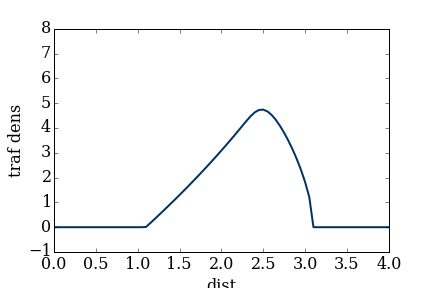
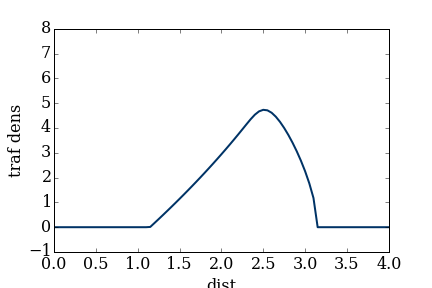
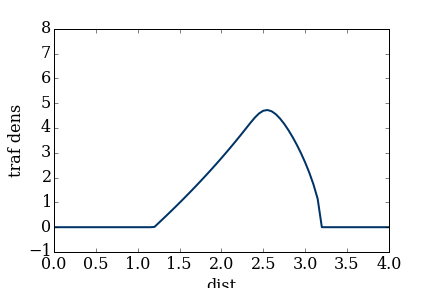
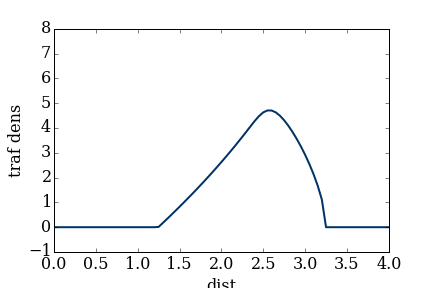
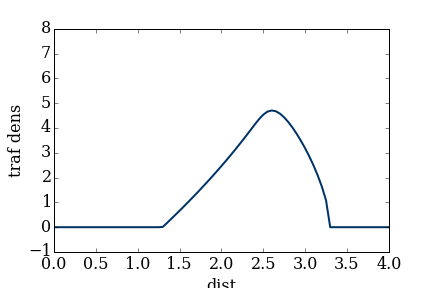
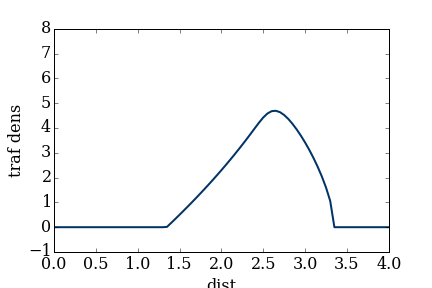
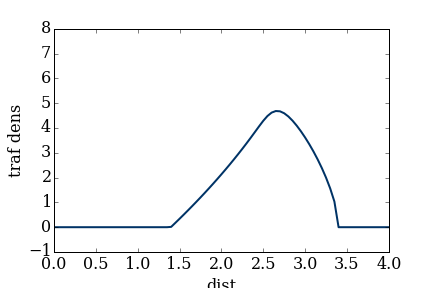
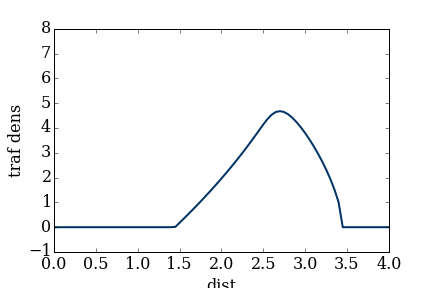

In [36]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-1,8),xlabel=('dist'),ylabel=('traf dens'));
line,=ax.plot([],[],color='#003366',lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig,animate,frames=rho_n,interval=50)
display_animation(anim,default_mode='once')

In [46]:
print (rho)


NameError: name 'rho' is not defined